In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
df=pd.read_csv("./")
df

FileNotFoundError: [Errno 2] No such file or directory: './worldometer_data.csv'

In [ ]:
df.isnull().sum()

Country/Region        0
Continent             1
Population            1
TotalCases            0
NewCases            205
TotalDeaths          21
NewDeaths           206
TotalRecovered        4
NewRecovered        206
ActiveCases           4
Serious,Critical     87
Tot Cases/1M pop      1
Deaths/1M pop        22
TotalTests           18
Tests/1M pop         18
WHO Region           25
dtype: int64

In [ ]:
df["Continent"].value_counts()

Africa               57
Asia                 48
Europe               48
North America        35
South America        14
Australia/Oceania     6
Name: Continent, dtype: int64

<AxesSubplot: xlabel='Continent', ylabel='Population'>

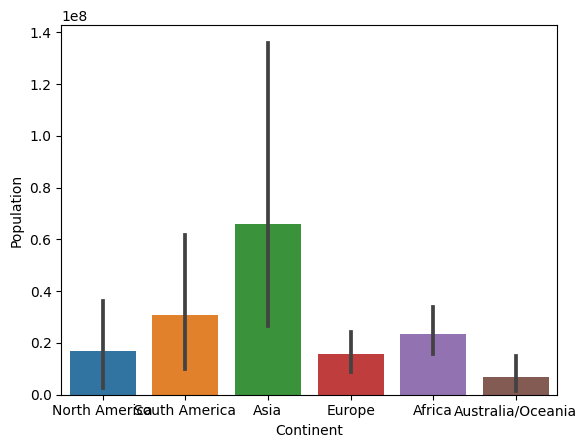

In [ ]:
sns.barplot(y=df.Population,x=df["Continent"])

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Americas'),
  Text(1, 0, 'South-EastAsia'),
  Text(2, 0, 'Europe'),
  Text(3, 0, 'Africa'),
  Text(4, 0, 'EasternMediterranean'),
  Text(5, 0, 'WesternPacific')])

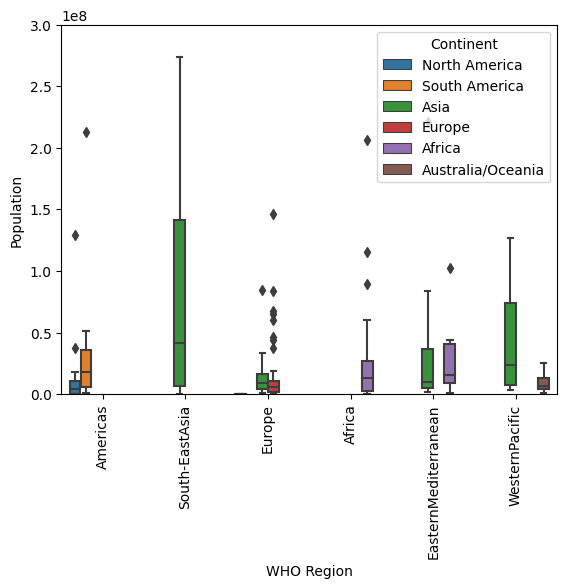

In [ ]:
sns.boxplot(x=df["WHO Region"],y=df["Population"],hue=df["Continent"])
plt.ylim(0,300000000)
plt.xticks(rotation=90)

C:\Users\NEERA KUMARI\AppData\Local\Temp\ipykernel_9680\3306941336.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(["Continent","Country/Region"]).sum()["TotalDeaths"].sort_values().tail(10).plot(kind="pie")


<AxesSubplot: ylabel='TotalDeaths'>

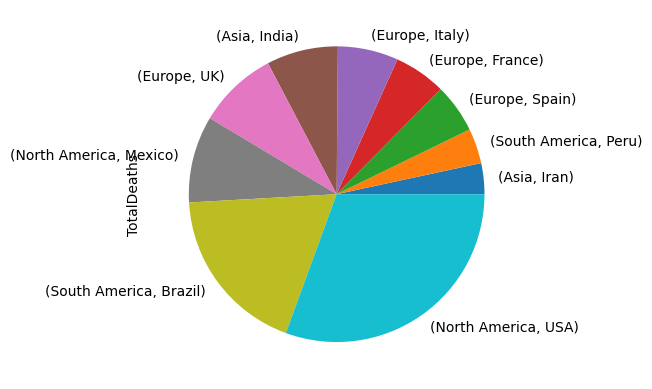

In [ ]:
df.groupby(["Continent","Country/Region"]).sum()["TotalDeaths"].sort_values().tail(10).plot(kind="pie")

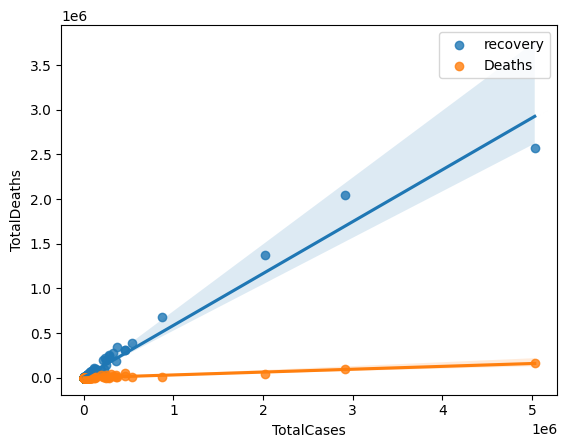

In [ ]:
sns.regplot(x=df["TotalCases"],y=df["TotalRecovered"],label="recovery")
sns.regplot(x=df["TotalCases"],y=df["TotalDeaths"],label="Deaths")
plt.legend()

<AxesSubplot: xlabel='Tot Cases/1M pop', ylabel='Deaths/1M pop'>

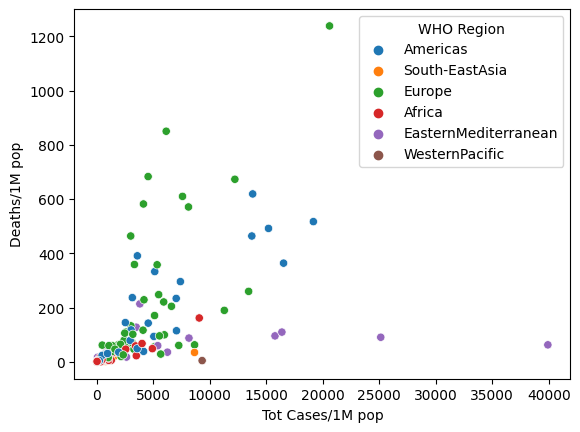

In [ ]:
sns.scatterplot(y=df["Deaths/1M pop"],x=df["Tot Cases/1M pop"],hue=df["WHO Region"])

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Americas'),
  Text(1, 0, 'South-EastAsia'),
  Text(2, 0, 'Europe'),
  Text(3, 0, 'Africa'),
  Text(4, 0, 'EasternMediterranean'),
  Text(5, 0, 'WesternPacific')])

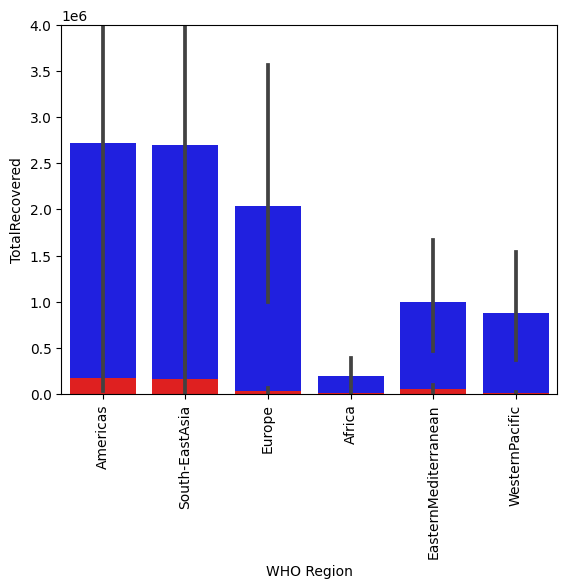

In [ ]:
sns.barplot(y=df["TotalTests"],x=df["WHO Region"],palette=["b","b","b","b","b"],label="total tests")
sns.barplot(y=df["TotalRecovered"],x=df["WHO Region"],palette=["r","r","r","r","r"],label="toatl recovered")
plt.ylim(0,4000000)
plt.xticks(rotation=90)

In [ ]:
a=df.groupby(["WHO Region","Country/Region"]).size().reset_index()
s=[]
for i in a["WHO Region"].unique():
    p=a[a["WHO Region"]==i]
    r=""
    for j in p["Country/Region"].values:
        r=r+j+" "
    
    s.append(r)
    
    
dfdata=pd.DataFrame()       
dfdata["countries"]=pd.DataFrame(s)  
dfdata["region"]=a["WHO Region"].unique()



In [ ]:
dfdata

,countries,region
0,Algeria Angola Benin Botswana Burkina Faso Bur...,Africa
1,Antigua and Barbuda Argentina Bahamas Barbados...,Americas
2,Afghanistan Bahrain Djibouti Egypt Iran Iraq J...,EasternMediterranean
3,Albania Andorra Armenia Austria Azerbaijan Bel...,Europe
4,Bangladesh Bhutan India Indonesia Maldives Mya...,South-EastAsia
5,Australia Cambodia Fiji Hong Kong Japan Laos M...,WesternPacific


C:\Users\NEERA KUMARI\AppData\Local\Temp\ipykernel_9680\1033314601.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["TotalDeaths"],label="Total Deaths")
C:\Users\NEERA KUMARI\AppData\Local\Temp\ipykernel_9680\1033314601.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["TotalRecovered

(0.0, 2000000.0)

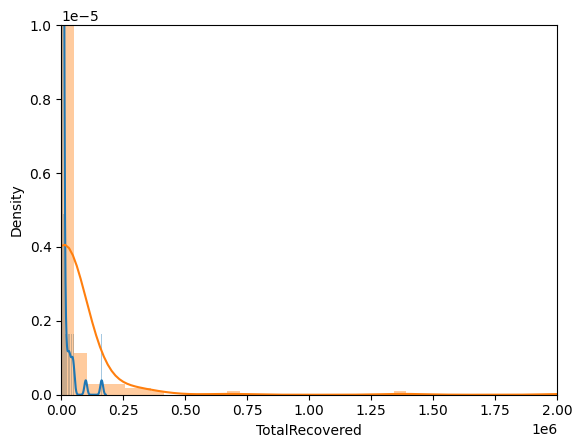

In [ ]:
sns.distplot(df["TotalDeaths"],label="Total Deaths")
sns.distplot(df["TotalRecovered"],label="Total Recovered")
plt.ylim(0,0.000010)
plt.xlim(0,2000000)


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Americas'),
  Text(1, 0, 'South-EastAsia'),
  Text(2, 0, 'Europe'),
  Text(3, 0, 'Africa'),
  Text(4, 0, 'EasternMediterranean'),
  Text(5, 0, 'WesternPacific')])

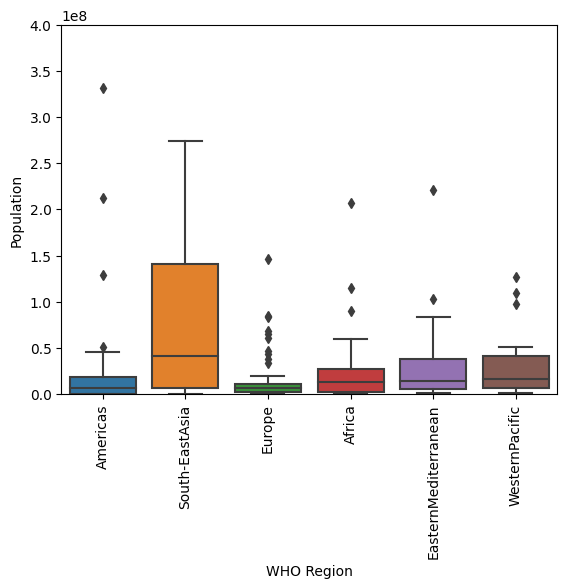

In [ ]:
sns.boxplot(y=df["Population"],x=df["WHO Region"])
plt.ylim(0,400000000)
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Population')

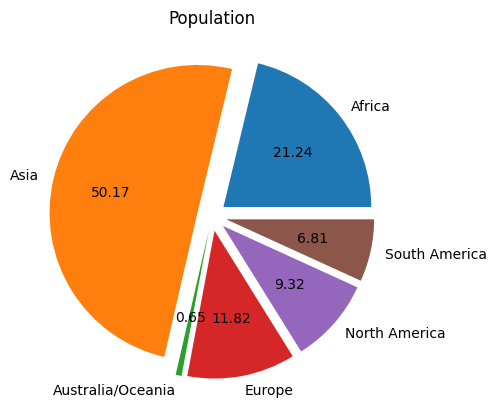

In [ ]:
# df.groupby("Continent").sum()["Population"].plot(kind="pie")
plt.pie(a["Population"],labels=a.index,autopct="%1.2f",explode=[0.1,0.1,0.1,0.1,0.1,0.1])
plt.title("Population")

([<matplotlib.patches.Wedge at 0x23b9ae99950>,
 [Text(0.8758258155216819, 0.08561040162142089, 'Africa'),
  Text(0.7067577316169978, 0.5243028788778447, 'Asia'),
  Text(0.41253169002013, 0.7773143538679417, 'Australia/Oceania'),
  Text(-0.3569118226517378, 0.8043717740270445, 'Europe'),
  Text(-0.6354875675303695, -0.6087327422722835, 'North America'),
  Text(0.6829041250735677, -0.555015275427177, 'South America')])

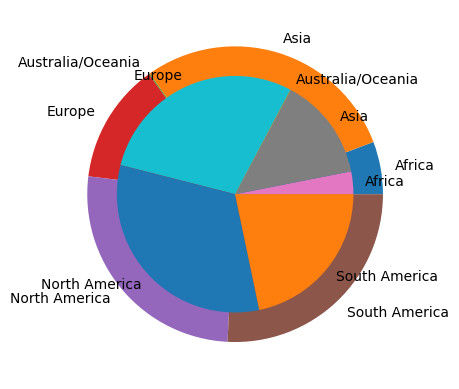

In [ ]:
plt.pie(a["TotalRecovered"],labels=a.index,radius=1)
plt.pie(a["TotalDeaths"],labels=a.index,radius=0.8)

Text(0.5, 1.0, 'Deaths')

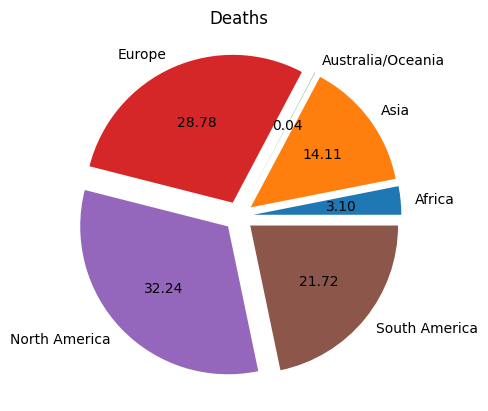

In [ ]:
plt.pie(a["TotalDeaths"],labels=a.index,autopct="%1.2f",explode=[0.1,0.1,0.1,0.1,0.1,0.1])
plt.title("Deaths")

<AxesSubplot: xlabel='Continent'>

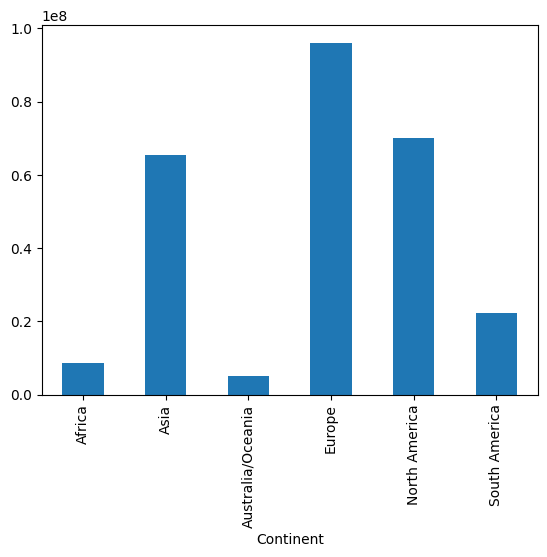

In [ ]:
p=(a["ActiveCases"].values/a["ActiveCases"].values.sum())*1000
color=["r","r","r","r","r","r"]
sns.scatterplot(y=a["ActiveCases"],x=a.index,s=p,color=color,label="Active Cases")


d=(a["TotalDeaths"].values/a["TotalDeaths"].values.sum())*1000
colors=["b","b","b","b","b","b"]
sns.scatterplot(y=a["TotalDeaths"],x=a.index,s=d,color=colors,label="Total Deaths")



it must be done with a loop 

SyntaxError: invalid syntax (14656587.py, line 12)

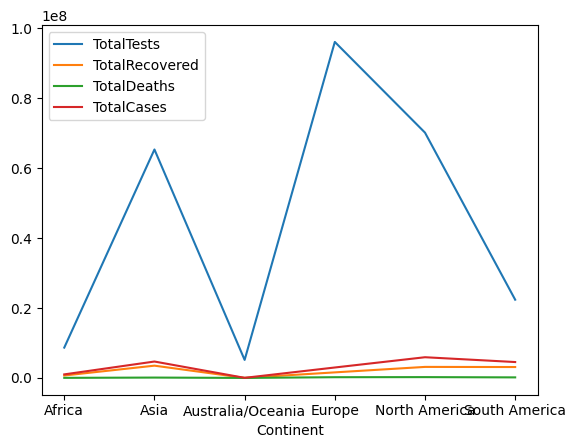

In [ ]:
a["TotalTests"].plot()
a["TotalRecovered"].plot()
a["TotalDeaths"].plot()
a["TotalCases"].plot()

plt.legend()

<AxesSubplot: xlabel='Continent', ylabel='Population'>

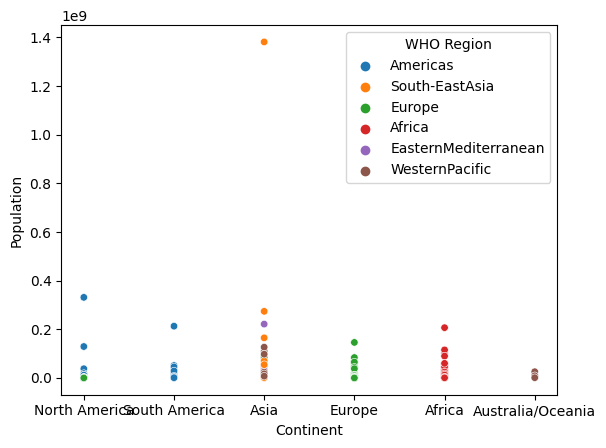

In [ ]:
sns.scatterplot(x=df["Continent"],y=df["Population"],hue=df["WHO Region"],s=29)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Thailand'),
  Text(1, 0, 'Germany'),
  Text(2, 0, 'Iran'),
  Text(3, 0, 'Turkey'),
  Text(4, 0, 'DRC'),
  Text(5, 0, 'Vietnam'),
  Text(6, 0, 'Egypt'),
  Text(7, 0, 'Philippines'),
  Text(8, 0, 'Ethiopia'),
  Text(9, 0, 'Japan'),
  Text(10, 0, 'Mexico'),
  Text(11, 0, 'Russia'),
  Text(12, 0, 'Bangladesh'),
  Text(13, 0, 'Nigeria'),
  Text(14, 0, 'Brazil'),
  Text(15, 0, 'Pakistan'),
  Text(16, 0, 'Indonesia'),
  Text(17, 0, 'USA'),
  Text(18, 0, 'India'),
  Text(19, 0, 'Diamond Princess')])

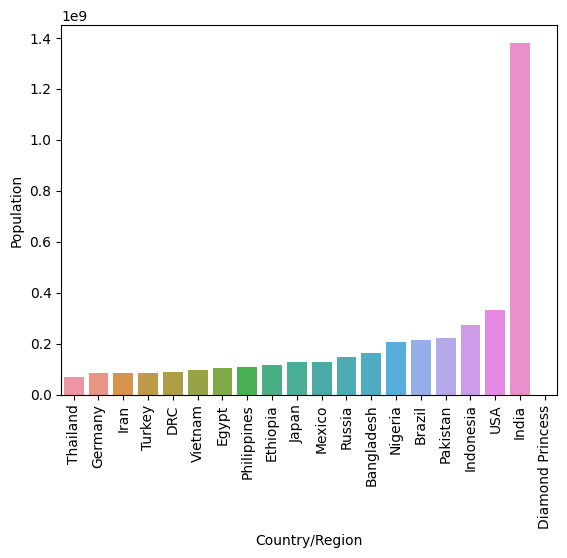

In [ ]:
b=df[["Country/Region","Population"]].sort_values("Population").tail(20)
sns.barplot(x=b["Country/Region"],y=b["Population"])
plt.xticks(rotation=90)


In [ ]:
a["ActiveCases"].plot(kind="bar")

NameError: name 'a' is not defined

In [ ]:
a=df.groupby("Continent").sum()
a

NameError: name 'df' is not defined

In [ ]:
df

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Montserrat,North America,4.992000e+03,13,NaN,1.0,NaN,10.0,NaN,2.0,NaN,2604.0,200.0,61.0,12220.0,NaN
205,Caribbean Netherlands,North America,2.624700e+04,13,NaN,NaN,NaN,7.0,NaN,6.0,NaN,495.0,NaN,424.0,16154.0,NaN
206,Falkland Islands,South America,3.489000e+03,13,NaN,NaN,NaN,13.0,NaN,0.0,NaN,3726.0,NaN,1816.0,520493.0,NaN
207,Vatican City,Europe,8.010000e+02,12,NaN,NaN,NaN,12.0,NaN,0.0,NaN,14981.0,NaN,NaN,NaN,Europe


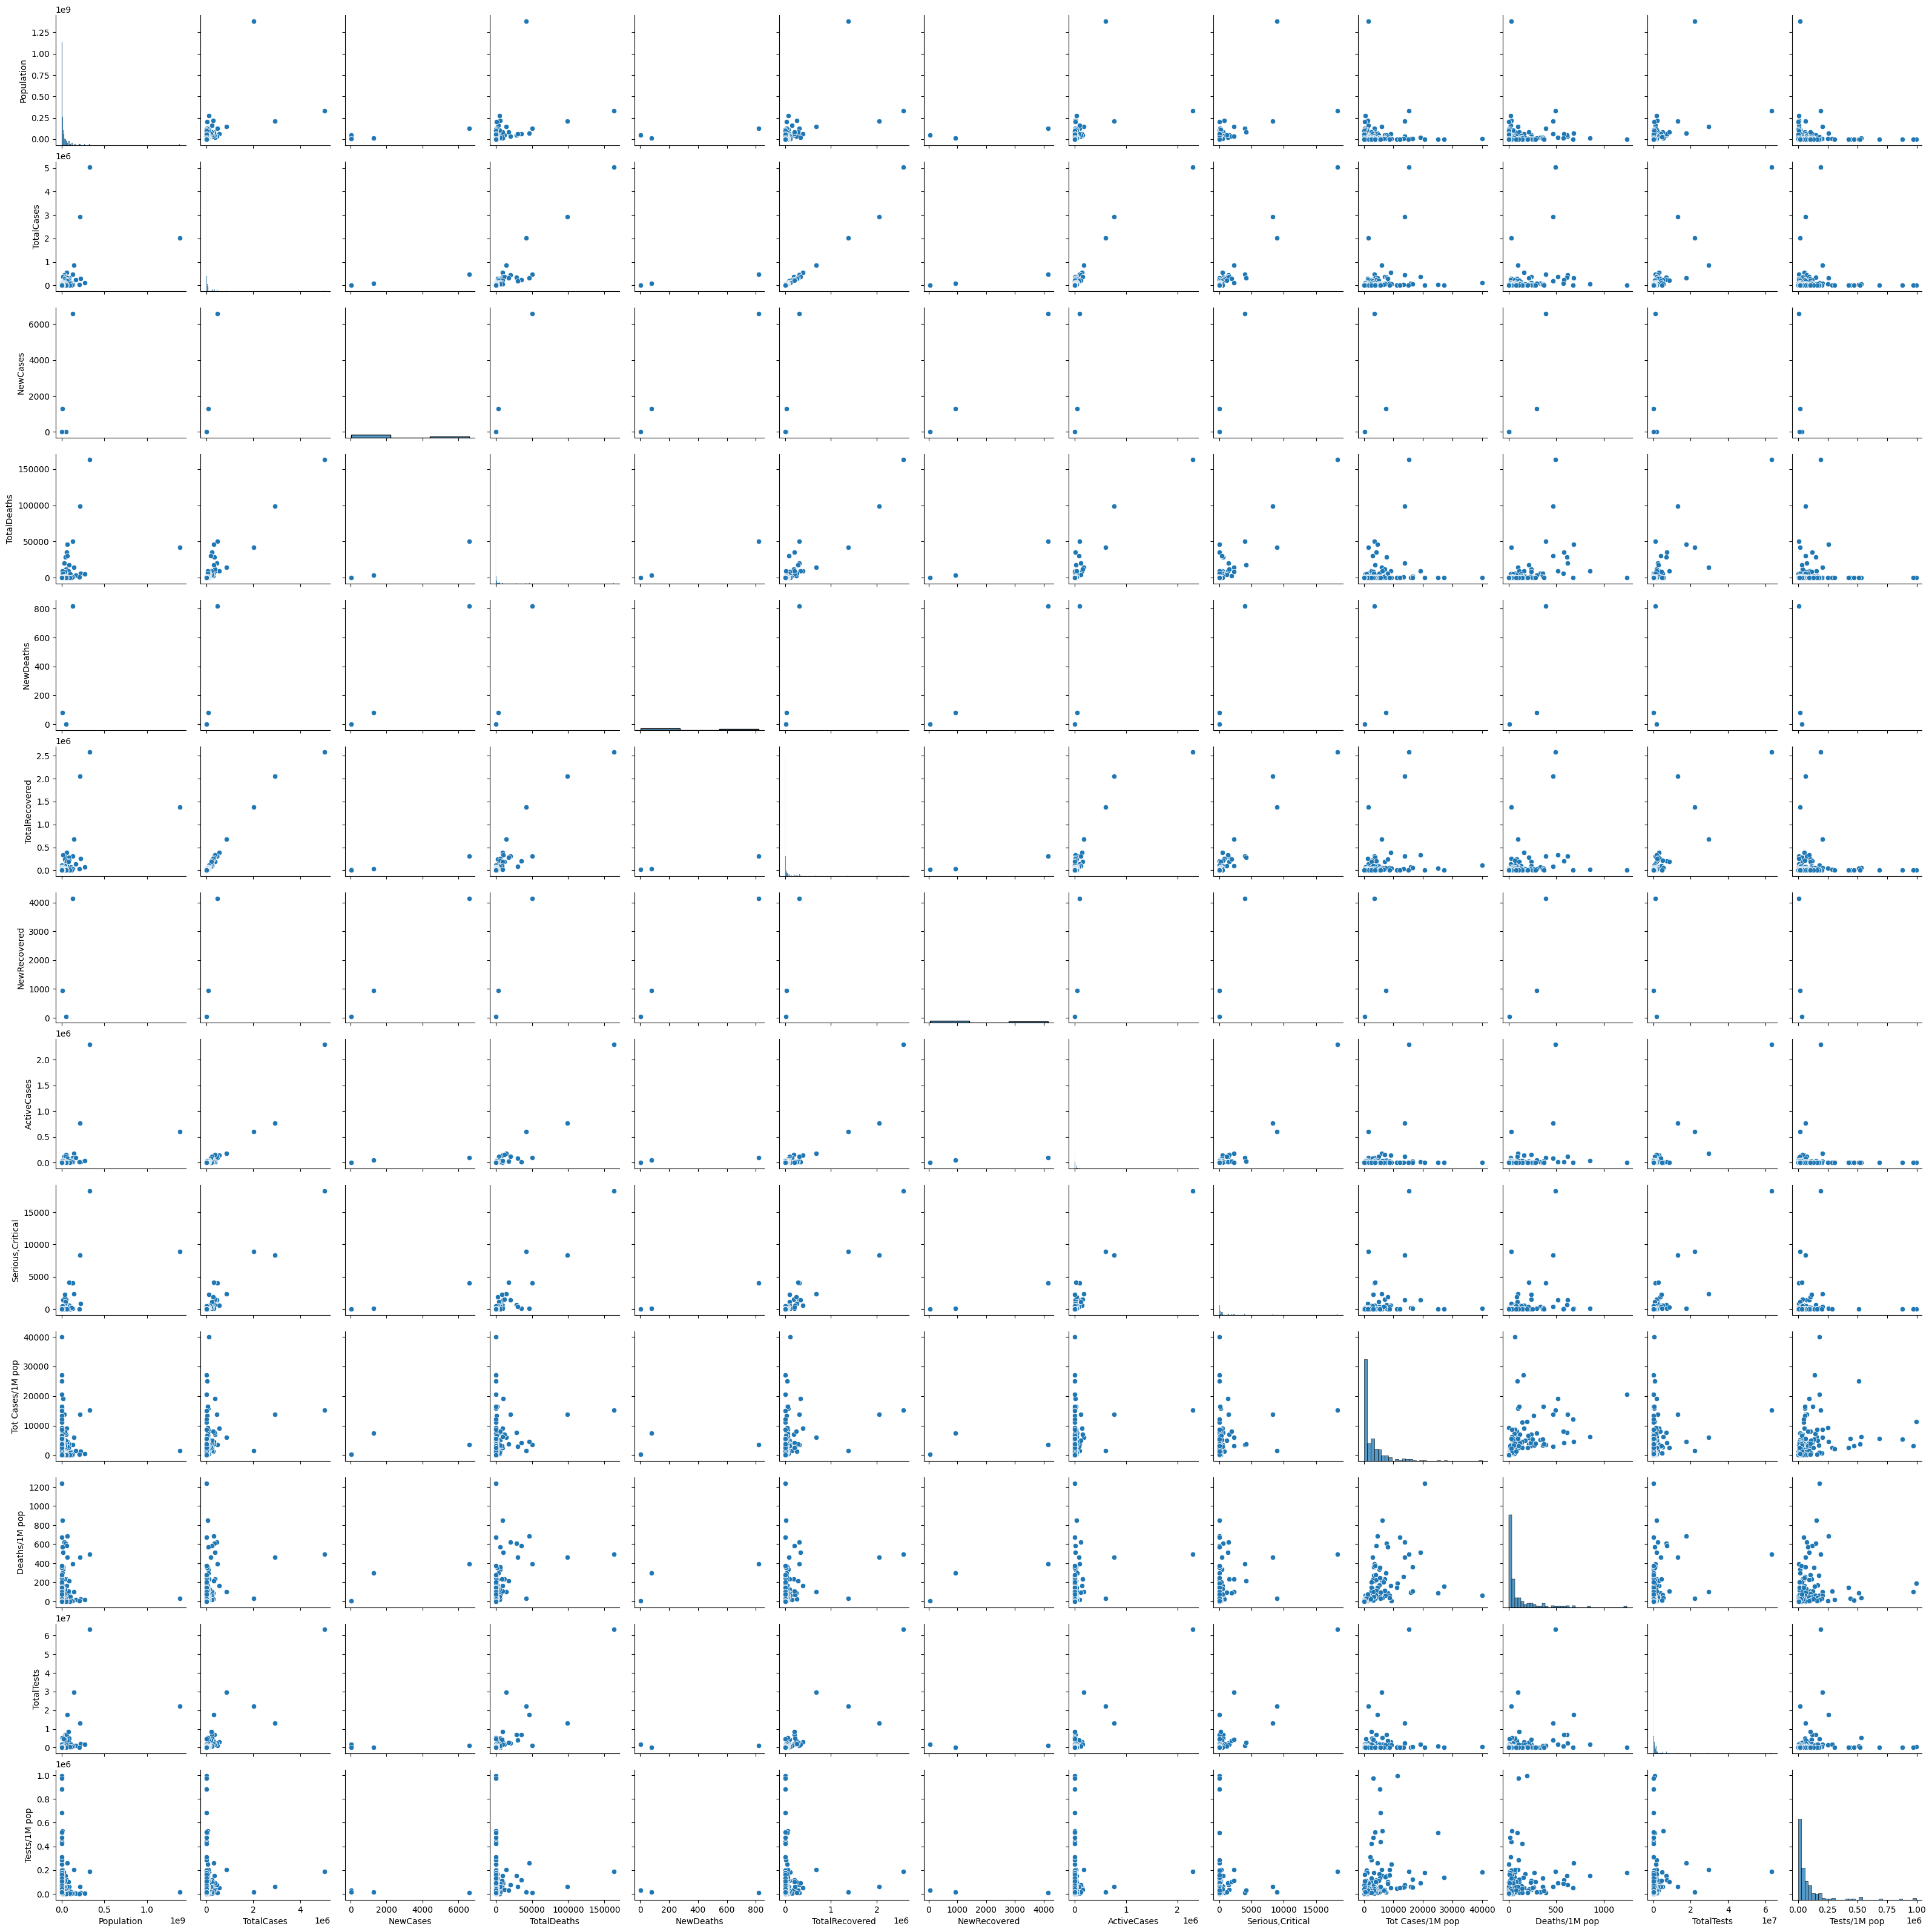

In [ ]:
sns.pairplot(df)

In [ ]:
dfRegion

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Montserrat,North America,4.992000e+03,13,NaN,1.0,NaN,10.0,NaN,2.0,NaN,2604.0,200.0,61.0,12220.0,NaN
205,Caribbean Netherlands,North America,2.624700e+04,13,NaN,NaN,NaN,7.0,NaN,6.0,NaN,495.0,NaN,424.0,16154.0,NaN
206,Falkland Islands,South America,3.489000e+03,13,NaN,NaN,NaN,13.0,NaN,0.0,NaN,3726.0,NaN,1816.0,520493.0,NaN
207,Vatican City,Europe,8.010000e+02,12,NaN,NaN,NaN,12.0,NaN,0.0,NaN,14981.0,NaN,NaN,NaN,Europe
